# <font color='#2F4F4F'>AfterWork Data Science: Recurrent Neural Networks with Python - Project</font>

## <font color='#2F4F4F'>Step 1. Business Understanding </font>

### a) Specifying the Research Question

Build a recurrent neural networks model that will be used to predict Tesla stock prices in 2017 using data from 2012-2016

### b) Defining the Metric for Success

Build a neural networks regression model with an RSME  less than 10% of the target mean.

### c) Understanding the Context 

Stockpy is an innovative fintech enabling financial prosperity for the entire population. It is a venture funded startup based in Palo Alto bringing world-class financial experiences to a continually growing customer base. As Stockpy enters an expansion phase for innovative fintech product offerings, it aims to enhance the enormous value in data processing and analysis for continuous growth and success.

As a Finance Data Scientist for Stockpy, you provide leadership to turn cutting-edge technology into actionable insights; unlocking the power of data that provides value to business decisions and customer service enhancements.

### d) Recording the Experimental Design

* Business Understanding
* Data Exploration
* Data Preparation
* Data Modeling and Evaluation
* Summary of Findings and Recommendation
* Challenging the Solution


## <font color='#2F4F4F'>Step 2. Data Importation</font>

In [19]:
# Importing standard libraries


# loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max.columns', None)
pd.set_option('display.max_colwidth', None)
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [20]:
# Importing our dataset - train data
#

tesla_train = pd.read_csv('https://bit.ly/38dSbSb')

tesla_train.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,5.788,5.900,5.53,5.616,5.616,4640500
1,2012-01-04,5.642,5.734,5.50,5.542,5.542,3150500
2,2012-01-05,5.552,5.586,5.37,5.424,5.424,5027500


In [21]:
# Importing our dataset - test data
#

tesla_test = pd.read_csv('https://bit.ly/3kW8E0K')

tesla_test.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-06,88.094002,90.311996,88.000000,90.307999,90.307999,50665000
1,2020-01-07,92.279999,94.325996,90.671997,93.811996,93.811996,89410500
2,2020-01-08,94.739998,99.697998,93.646004,98.428001,98.428001,155721500


## <font color='#2F4F4F'>Step 3. Data Exploration</font>

In [22]:
# Sample dataset
# ---


tesla_train.sample(5)

,Date,Open,High,Low,Close,Adj Close,Volume
1153,2016-08-03,45.473999,45.939999,44.841999,45.158001,45.158001,19439000
87,2012-05-08,6.500000,6.546000,5.874000,6.038000,6.038000,15486000
505,2014-01-07,29.524000,30.080000,29.049999,29.872000,29.872000,25170500
611,2014-06-10,40.886002,41.394001,40.310001,40.459999,40.459999,17573500
981,2015-11-25,44.268002,46.166000,44.076000,45.928001,45.928001,19954000


In [23]:
# Sample dataset
# ---

tesla_test.sample(5)

,Date,Open,High,Low,Close,Adj Close,Volume
130,2020-07-13,331.799988,358.997986,294.221985,299.411987,299.411987,194927000
45,2020-03-11,128.039993,130.716003,122.599998,126.846001,126.846001,66612500
32,2020-02-21,181.395996,182.612000,176.089996,180.199997,180.199997,71574000
51,2020-03-19,74.940002,90.400002,71.692001,85.528000,85.528000,150977500
101,2020-06-01,171.600006,179.800003,170.820007,179.619995,179.619995,74697500


In [24]:
# Statistical summary
# ---
#
tesla_train.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,31.997898,32.558671,31.403696,31.989245,31.989245,2.551310e+07
std,16.911515,17.148543,16.649245,16.903500,16.903500,2.259037e+07
min,5.324000,5.370000,4.528000,4.558000,4.558000,1.824500e+06
25%,8.403000,8.556000,8.197000,8.379500,8.379500,1.059400e+07
50%,39.411000,40.123998,38.709000,39.427000,39.427000,2.007650e+07
75%,45.214499,45.934999,44.303000,45.076502,45.076502,3.245150e+07
max,57.534000,58.284000,56.080002,57.208000,57.208000,1.858195e+08


In [25]:
# Statistical summary
# ---
#
tesla_test.describe()

,Open,High,Low,Close,Adj Close,Volume
count,212.000000,212.000000,212.000000,212.000000,212.000000,2.120000e+02
mean,240.694491,247.799095,233.274349,240.913839,240.913839,7.249677e+07
std,124.236274,127.287045,120.477241,124.168969,124.168969,4.239540e+07
min,74.940002,80.972000,70.101997,72.244003,72.244003,1.265600e+07
25%,143.104000,150.257004,138.299995,145.732002,145.732002,4.297360e+07
50%,183.679001,190.444000,180.951996,185.269997,185.269997,6.933325e+07
75%,365.883987,382.275009,353.599991,371.684997,371.684997,9.324912e+07
max,502.140015,502.489990,470.510010,498.320007,498.320007,3.046940e+08


## <font color='#2F4F4F'>Step 4. Data Preparation</font>

In [26]:
# Getting our train dataset
# ---
## We will use the 'Open' price for prediction.

train = tesla_train.iloc[:, 1:2].values

In [27]:
train

array([[ 5.788   ],
       [ 5.642   ],
       [ 5.552   ],
       ...,
       [44.306   ],
       [43.712002],
       [43.259998]])

In [33]:
# Performing Feature scaling
# ---

# we do this because the values in the training dataset are not in the same range. 

from sklearn.preprocessing import MinMaxScaler

sc =  MinMaxScaler(feature_range = (0, 1))
train_scaled = sc.fit_transform(train)
print(train_scaled)


[[0.00888719]
 [0.00609079]
 [0.00436698]
 ...
 [0.74663857]
 [0.73526148]
 [0.72660406]]


In [36]:
# Creating a dataset with 60 timesteps and 1 output
# ---
#
# A special data structure is needed to cover 60-time stamps, based on which RNN will predict the 61st price. 
# The number of past timestamps is set to 60 based on experimentation.
# Thus, X_train is a nested list, which contains lists of 60 time-stamp prices. 
# y_train is a list of stock prices which is the next day stock price, corresponding to each list in X_train.
# ---
#

X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(train_scaled [i-60:i, 0])
    y_train.append(train_scaled [i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train, y_train

(array([[0.00888719, 0.00609079, 0.00436698, ..., 0.03436123, 0.04037541,
         0.04275043],
        [0.00609079, 0.00436698, 0.0022218 , ..., 0.04037541, 0.04275043,
         0.04432101],
        [0.00436698, 0.0022218 , 0.00145566, ..., 0.04275043, 0.04432101,
         0.04175445],
        ...,
        [0.71128134, 0.71434589, 0.71105156, ..., 0.69565219, 0.69480939,
         0.72116457],
        [0.71434589, 0.71105156, 0.67358745, ..., 0.69480939, 0.72116457,
         0.74663857],
        [0.71105156, 0.67358745, 0.66799466, ..., 0.72116457, 0.74663857,
         0.73526148]]),
 array([0.04432101, 0.04175445, 0.04102662, ..., 0.74663857, 0.73526148,
        0.72660406]))

In [38]:
# Previewing X_train
print(X_train)

[[[0.00888719]
  [0.00609079]
  [0.00436698]
  ...
  [0.03436123]
  [0.04037541]
  [0.04275043]]

 [[0.00609079]
  [0.00436698]
  [0.0022218 ]
  ...
  [0.04037541]
  [0.04275043]
  [0.04432101]]

 [[0.00436698]
  [0.0022218 ]
  [0.00145566]
  ...
  [0.04275043]
  [0.04432101]
  [0.04175445]]

 ...

 [[0.71128134]
  [0.71434589]
  [0.71105156]
  ...
  [0.69565219]
  [0.69480939]
  [0.72116457]]

 [[0.71434589]
  [0.71105156]
  [0.67358745]
  ...
  [0.69480939]
  [0.72116457]
  [0.74663857]]

 [[0.71105156]
  [0.67358745]
  [0.66799466]
  ...
  [0.72116457]
  [0.74663857]
  [0.73526148]]]


In [39]:
# Previewing y_train
# ---
#
print(y_train)

[0.04432101 0.04175445 0.04102662 ... 0.74663857 0.73526148 0.72660406]


In [40]:
# Reshaping 
# ---

#Here, only the features which are to be fed to the neural network are chosen. 
# We choose the features Date, open, high, low, close, and volume.
# ---
# We also reshape our dataset to have 3D shape. We do this because 
# the input to LSTM layer of our RNN should be in 3D shape i.e. (samples, time-steps, features/indicators).
# a. The samples are the number of samples in the input data. 
# b. The time-steps is the number of time-steps per sample. 
# c. Features correspond to the number of features per time-step i.e. one feature per time-step.
# ---
##


X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

##  <font color='#2F4F4F'>Step 5. Data Modeling</font>

In [41]:
# Building the RNN
# ---
#
## import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [42]:
# Initialising the RNN
# ---
#
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation

regressor.add(LSTM(units = 50, return_sequences = False))
regressor.add(Dropout(0.2))

# Adding the output layer

regressor.add(Dense(units = 1))

In [43]:
# Compile the RNN 
# ---
#
#
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [44]:
# Fitting the RNN to the training set
# ---

regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 11s 16ms/step - loss: 0.0514
Epoch 2/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0097
Epoch 3/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0082
Epoch 4/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0077
Epoch 5/100
38/38 [==============================] - 1s 13ms/step - loss: 0.0077
Epoch 6/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0068
Epoch 7/100
38/38 [==============================] - 1s 13ms/step - loss: 0.0067
Epoch 8/100
38/38 [==============================] - 1s 13ms/step - loss: 0.0065
Epoch 9/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0062
Epoch 10/100
38/38 [==============================] - 1s 13ms/step - loss: 0.0059
Epoch 11/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0064
Epoch 12/100
38/38 [==============================] - 1s 13ms/step - loss: 0.0065
Epoch 13/100
38/38 [====

In [46]:
# Making predictions: Getting the predicted stock price for 2017
# ---
#
tesla_test = pd.read_csv('https://bit.ly/3kW8E0K')

tesla_test.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-06,88.094002,90.311996,88.000000,90.307999,90.307999,50665000
1,2020-01-07,92.279999,94.325996,90.671997,93.811996,93.811996,89410500
2,2020-01-08,94.739998,99.697998,93.646004,98.428001,98.428001,155721500


In [48]:
# Visualizing the results
real_price = tesla_test.iloc[:, 1:2].values

# Getting the Predicted Stock Price of 2017

#
dataset = pd.concat((tesla_train['Open'],
                           tesla_test['Open']), axis=0)

#
inputs = dataset[len(dataset)-len(tesla_test)-60:].values

# Reshaping the inputs to have only 1 column
# ---
#
inputs = inputs.reshape(-1, 1)


# Using the scale set by the training set to scale the test inputs
# ---
#
inputs = sc.transform(inputs)

# Then creating the test data structure just as we did for the train dataset
# ---

X_test = []
y_test = []

for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i, 0])
    y_test.append(inputs[i, 0])

X_test, y_test  = np.array(X_test), np.array(y_test)  
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Making our Predictions
# ---
#
predicted_price = regressor.predict(X_test)


predicted_price = sc.inverse_transform(predicted_price)
print(predicted_price)

[[ 43.017544]
 [ 63.06648 ]
 [ 89.61085 ]
 [ 85.557014]
 [ 84.505196]
 [ 81.2053  ]
 [ 87.221275]
 [ 98.96253 ]
 [ 92.182945]
 [ 85.36434 ]
 [ 91.75574 ]
 [ 95.173775]
 [102.513016]
 [ 93.748955]
 [ 96.85412 ]
 [ 88.60666 ]
 [100.60237 ]
 [ 96.842606]
 [109.86908 ]
 [100.027435]
 [109.69955 ]
 [136.0923  ]
 [100.96482 ]
 [ 88.07251 ]
 [125.566765]
 [122.67127 ]
 [107.799065]
 [115.82087 ]
 [105.06156 ]
 [126.99293 ]
 [121.06486 ]
 [129.22719 ]
 [113.11521 ]
 [123.4358  ]
 [108.39713 ]
 [129.05287 ]
 [102.63926 ]
 [112.48744 ]
 [ 91.12669 ]
 [129.54819 ]
 [121.605446]
 [101.86081 ]
 [104.12506 ]
 [105.648834]
 [ 92.09691 ]
 [118.64894 ]
 [ 97.326195]
 [ 91.57987 ]
 [101.73204 ]
 [ 72.657425]
 [ 81.66565 ]
 [ 70.9407  ]
 [ 71.48096 ]
 [ 79.4939  ]
 [ 79.13418 ]
 [ 84.07978 ]
 [ 93.527534]
 [ 88.061966]
 [ 78.78124 ]
 [ 84.95588 ]
 [ 84.26149 ]
 [ 87.960304]
 [ 82.798836]
 [ 90.71872 ]
 [ 88.168396]
 [ 95.8262  ]
 [ 93.00135 ]
 [ 94.51035 ]
 [ 99.550446]
 [118.72728 ]
 [111.1075  ]
 [ 99.

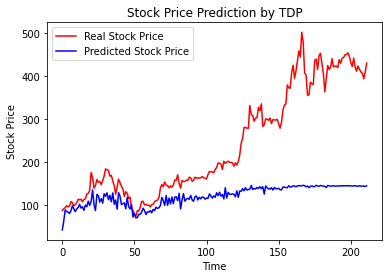

In [50]:
# Model Visualization
# ---
#
import matplotlib.pyplot as plt 

plt.plot(real_price, color='red', label='Real Stock Price')
plt.plot(predicted_price, color='blue',
         label='Predicted Stock Price')
plt.title('Stock Price Prediction by TDP')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [51]:
# Model Evaluation
# ---

import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_price, predicted_price))
print(rmse)
print(real_price.mean())

158.8138803675827
240.69449118396224


## <font color='#2F4F4F'>Step 6. Summary of Findings and Recommendation</font>

The RMSE value obtained is 158.8 which is more than 10% of the target mean (240.69).
Therefore the RMSE is very high. This tells us that the model is not able to predict the tesla stock prices very accurately.

## <font color='#2F4F4F'>Step 7. Challenging our Solution</font>

#### a) Did we have the right question?
yes

#### b) Did we have the right data?
yes

#### c) What can be done to improve the solution?

* Getting more training data
* Increasing the timesteps
* Adding some other indicators
* Adding more LSTM layers
* Adding more neurons in the LSTM layers


